In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
# import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
# from wordcloud import WordCloud
pd.options.mode.chained_assignment = None  # default='warn'

In [7]:
df_data = pd.read_csv('ratings_1-0.txt')

In [11]:
df_data

,QoS,QoR,Int,QoE,Hit
0,5,3,1,2,1
1,3,4,4,4,1
2,4,5,3,4,1
3,4,5,1,1,1
4,3,2,4,3,1
5,5,2,5,4,1
6,4,4,4,4,1
7,5,5,4,4,1
8,4,3,4,4,1
9,3,4,4,4,0


In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False, interaction_only=False)
df_transformed = poly.fit_transform(df_data)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(df_transformed)
df_transformed = scaler.transform(df_transformed)
df_transformed

array([[5.  , 3.  , 1.  , ..., 1.64, 2.6 , 5.  ],
       [3.  , 4.  , 4.  , ..., 3.56, 4.2 , 5.  ],
       [4.  , 5.  , 3.  , ..., 3.56, 4.2 , 5.  ],
       ...,
       [5.  , 5.  , 5.  , ..., 1.  , 1.  , 1.  ],
       [2.  , 2.  , 2.  , ..., 1.  , 1.  , 1.  ],
       [4.  , 3.  , 4.  , ..., 3.56, 4.2 , 5.  ]])

In [178]:
df_transformed[0]

array([5.        , 3.        , 1.        , 2.        , 5.        ,
       3.33333333, 1.66666667, 2.5       , 5.        , 1.33333333,
       1.83333333, 3.4       , 1.16666667, 1.8       , 2.6       ])

In [73]:
df_transformed[0]

array([ 5.,  3.,  1.,  2.,  1., 15.,  5., 10.,  5.,  3.,  6.,  3.,  2.,
        1.,  2.])

In [188]:
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x4^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x4^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2 x3^2',
 'x2 x3 x4',
 'x2 x4^2',
 'x3^3',
 'x3^2 x4',
 'x3 x4^2',
 'x4^3']

In [201]:
for pair in features:
    print(pair)

QoS
QoR
Int
QoE
Hit


In [9]:
features = [{'old': 'x0', 'new': 'QoS'}, {'old': 'x1', 'new': 'QoR'}, {'old': 'x2', 'new': 'Int'},
            {'old': 'x3', 'new': 'QoE'}, {'old': 'x4', 'new': 'Hit'}]

featureNames = poly.get_feature_names()
for i in range (len( featureNames )):
    for pair in features:
        featureNames[i] = featureNames[i].replace(pair['old'], pair['new'])
    featureNames[i] =featureNames[i].replace( ' ', '*')
        

df_transformed = pd.DataFrame(df_transformed, columns=featureNames)
df_transformed

['QoS', 'QoR', 'Int', 'QoE', 'Hit', 'QoS^2', 'QoS*QoR', 'QoS*Int', 'QoS*QoE', 'QoS*Hit', 'QoR^2', 'QoR*Int', 'QoR*QoE', 'QoR*Hit', 'Int^2', 'Int*QoE', 'Int*Hit', 'QoE^2', 'QoE*Hit', 'Hit^2', 'QoS^3', 'QoS^2*QoR', 'QoS^2*Int', 'QoS^2*QoE', 'QoS^2*Hit', 'QoS*QoR^2', 'QoS*QoR*Int', 'QoS*QoR*QoE', 'QoS*QoR*Hit', 'QoS*Int^2', 'QoS*Int*QoE', 'QoS*Int*Hit', 'QoS*QoE^2', 'QoS*QoE*Hit', 'QoS*Hit^2', 'QoR^3', 'QoR^2*Int', 'QoR^2*QoE', 'QoR^2*Hit', 'QoR*Int^2', 'QoR*Int*QoE', 'QoR*Int*Hit', 'QoR*QoE^2', 'QoR*QoE*Hit', 'QoR*Hit^2', 'Int^3', 'Int^2*QoE', 'Int^2*Hit', 'Int*QoE^2', 'Int*QoE*Hit', 'Int*Hit^2', 'QoE^3', 'QoE^2*Hit', 'QoE*Hit^2', 'Hit^3']


In [10]:
#[QoS, QoR, Int, QoE, Hit, QoS*QoR, QoS*Int, QoS*QoE, QoS*Int, QoS*Hit, QoR*Int, QoR*QoE, QoR*Hit, Int*QoE, Int*Hit]
df_transformed = pd.DataFrame(df_transformed, columns=featureNames)
df_transformed

,QoS,QoR,Int,QoE,Hit,QoS^2,QoS*QoR,QoS*Int,QoS*QoE,QoS*Hit,...,Int^3,Int^2*QoE,Int^2*Hit,Int*QoE^2,Int*QoE*Hit,Int*Hit^2,QoE^3,QoE^2*Hit,QoE*Hit^2,Hit^3
0,5.0,3.0,1.0,2.0,5.0,5.000000,3.333333,1.666667,2.500000,5.0,...,1.000000,1.032258,1.16,1.096774,1.32,1.8,1.225806,1.64,2.6,5.0
1,3.0,4.0,4.0,4.0,5.0,2.333333,2.833333,2.833333,2.833333,3.4,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
2,4.0,5.0,3.0,4.0,5.0,3.500000,4.166667,2.833333,3.500000,4.2,...,1.838710,2.129032,2.44,2.516129,2.92,3.4,3.032258,3.56,4.2,5.0
3,4.0,5.0,1.0,1.0,5.0,3.500000,4.166667,1.500000,1.500000,4.2,...,1.000000,1.000000,1.16,1.000000,1.16,1.8,1.000000,1.16,1.8,5.0
4,3.0,2.0,4.0,3.0,5.0,2.333333,1.833333,2.833333,2.333333,3.4,...,3.032258,2.516129,3.56,2.129032,2.92,4.2,1.838710,2.44,3.4,5.0
5,5.0,2.0,5.0,4.0,5.0,5.000000,2.500000,5.000000,4.166667,5.0,...,5.000000,4.193548,5.00,3.548387,4.20,5.0,3.032258,3.56,4.2,5.0
6,4.0,4.0,4.0,4.0,5.0,3.500000,3.500000,3.500000,3.500000,4.2,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
7,5.0,5.0,4.0,4.0,5.0,5.000000,5.000000,4.166667,4.166667,5.0,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
8,4.0,3.0,4.0,4.0,5.0,3.500000,2.833333,3.500000,3.500000,4.2,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
9,3.0,4.0,4.0,4.0,1.0,2.333333,2.833333,2.833333,2.833333,1.0,...,3.032258,3.032258,1.00,3.032258,1.00,1.0,3.032258,1.00,1.0,1.0


In [5]:
df_transformed.corr().loc[df_transformed.corr().QoE>0.75]

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [11]:
df_transformed.corr()

,QoS,QoR,Int,QoE,Hit,QoS^2,QoS*QoR,QoS*Int,QoS*QoE,QoS*Hit,...,Int^3,Int^2*QoE,Int^2*Hit,Int*QoE^2,Int*QoE*Hit,Int*Hit^2,QoE^3,QoE^2*Hit,QoE*Hit^2,Hit^3
QoS,1.000000,0.174420,0.316074,0.674901,0.703094,0.987095,0.826156,0.839255,0.880433,0.858856,...,0.318526,0.550459,0.699424,0.613975,0.722711,0.750321,0.624922,0.721205,0.764856,0.703094
QoR,0.174420,1.000000,0.417210,0.387021,-0.074331,0.196617,0.633585,0.308917,0.321793,0.069644,...,0.372016,0.373384,0.180788,0.376119,0.214016,0.128375,0.383651,0.238119,0.159796,-0.074331
Int,0.316074,0.417210,1.000000,0.631007,0.041899,0.330223,0.422299,0.719099,0.552314,0.205319,...,0.953211,0.847382,0.583333,0.735786,0.546518,0.459565,0.614589,0.461695,0.364075,0.041899
QoE,0.674901,0.387021,0.631007,1.000000,0.433599,0.665307,0.705513,0.817011,0.899466,0.553569,...,0.600920,0.857403,0.693951,0.926158,0.752894,0.667455,0.944186,0.778711,0.720117,0.433599
Hit,0.703094,-0.074331,0.041899,0.433599,1.000000,0.703519,0.505287,0.531843,0.606213,0.922044,...,0.082516,0.294061,0.721898,0.369307,0.740795,0.852879,0.402140,0.745280,0.870253,1.000000
QoS^2,0.987095,0.196617,0.330223,0.665307,0.703519,1.000000,0.831522,0.847168,0.887796,0.875596,...,0.343437,0.566311,0.721065,0.628779,0.744989,0.764032,0.638925,0.741375,0.776427,0.703519
QoS*QoR,0.826156,0.633585,0.422299,0.705513,0.505287,0.831522,1.000000,0.794720,0.840695,0.670043,...,0.412971,0.610428,0.630534,0.669131,0.670042,0.639754,0.685825,0.684944,0.671136,0.505287
QoS*Int,0.839255,0.308917,0.719099,0.817011,0.531843,0.847168,0.794720,1.000000,0.933131,0.700943,...,0.719846,0.869513,0.864001,0.863896,0.854414,0.816641,0.802261,0.794870,0.761015,0.531843
QoS*QoE,0.880433,0.321793,0.552314,0.899466,0.606213,0.887796,0.840695,0.933131,1.000000,0.759703,...,0.550317,0.802586,0.805840,0.875513,0.859441,0.799892,0.892280,0.875345,0.840876,0.606213
QoS*Hit,0.858856,0.069644,0.205319,0.553569,0.922044,0.875596,0.670043,0.700943,0.759703,1.000000,...,0.228203,0.435525,0.802143,0.502767,0.826683,0.893601,0.525536,0.827503,0.911270,0.922044


In [12]:
df_transformed.describe()

,QoS,QoR,Int,QoE,Hit,QoS^2,QoS*QoR,QoS*Int,QoS*QoE,QoS*Hit,...,Int^3,Int^2*QoE,Int^2*Hit,Int*QoE^2,Int*QoE*Hit,Int*Hit^2,QoE^3,QoE^2*Hit,QoE*Hit^2,Hit^3
count,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,...,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000
mean,3.375870,3.484919,3.593968,3.164733,3.440835,3.165507,2.852668,2.969064,2.877804,3.090023,...,3.046553,2.725395,2.481578,2.617469,2.447796,2.776334,2.617768,2.478608,2.791183,3.440835
std,1.613251,1.251652,1.339858,1.457382,1.953078,1.660745,1.292150,1.410214,1.471616,1.813763,...,1.572341,1.444069,1.642213,1.457670,1.563833,1.666551,1.526080,1.587503,1.646933,1.953078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,2.000000,1.000000,1.500000,1.666667,1.666667,1.500000,1.000000,...,1.838710,1.354839,1.000000,1.225806,1.000000,1.000000,1.225806,1.000000,1.000000,1.000000
50%,4.000000,4.000000,4.000000,3.000000,5.000000,3.500000,2.833333,2.500000,2.833333,4.200000,...,3.032258,2.419355,1.640000,2.129032,1.640000,2.600000,1.838710,1.640000,2.600000,5.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.166667,4.166667,4.166667,5.000000,...,5.000000,4.193548,3.560000,3.548387,4.200000,4.200000,3.032258,3.560000,4.200000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
sns.set(rc={'figure.figsize':(20,14), 'font.size': 16})
sns.set(font_scale=1.8, style='white')


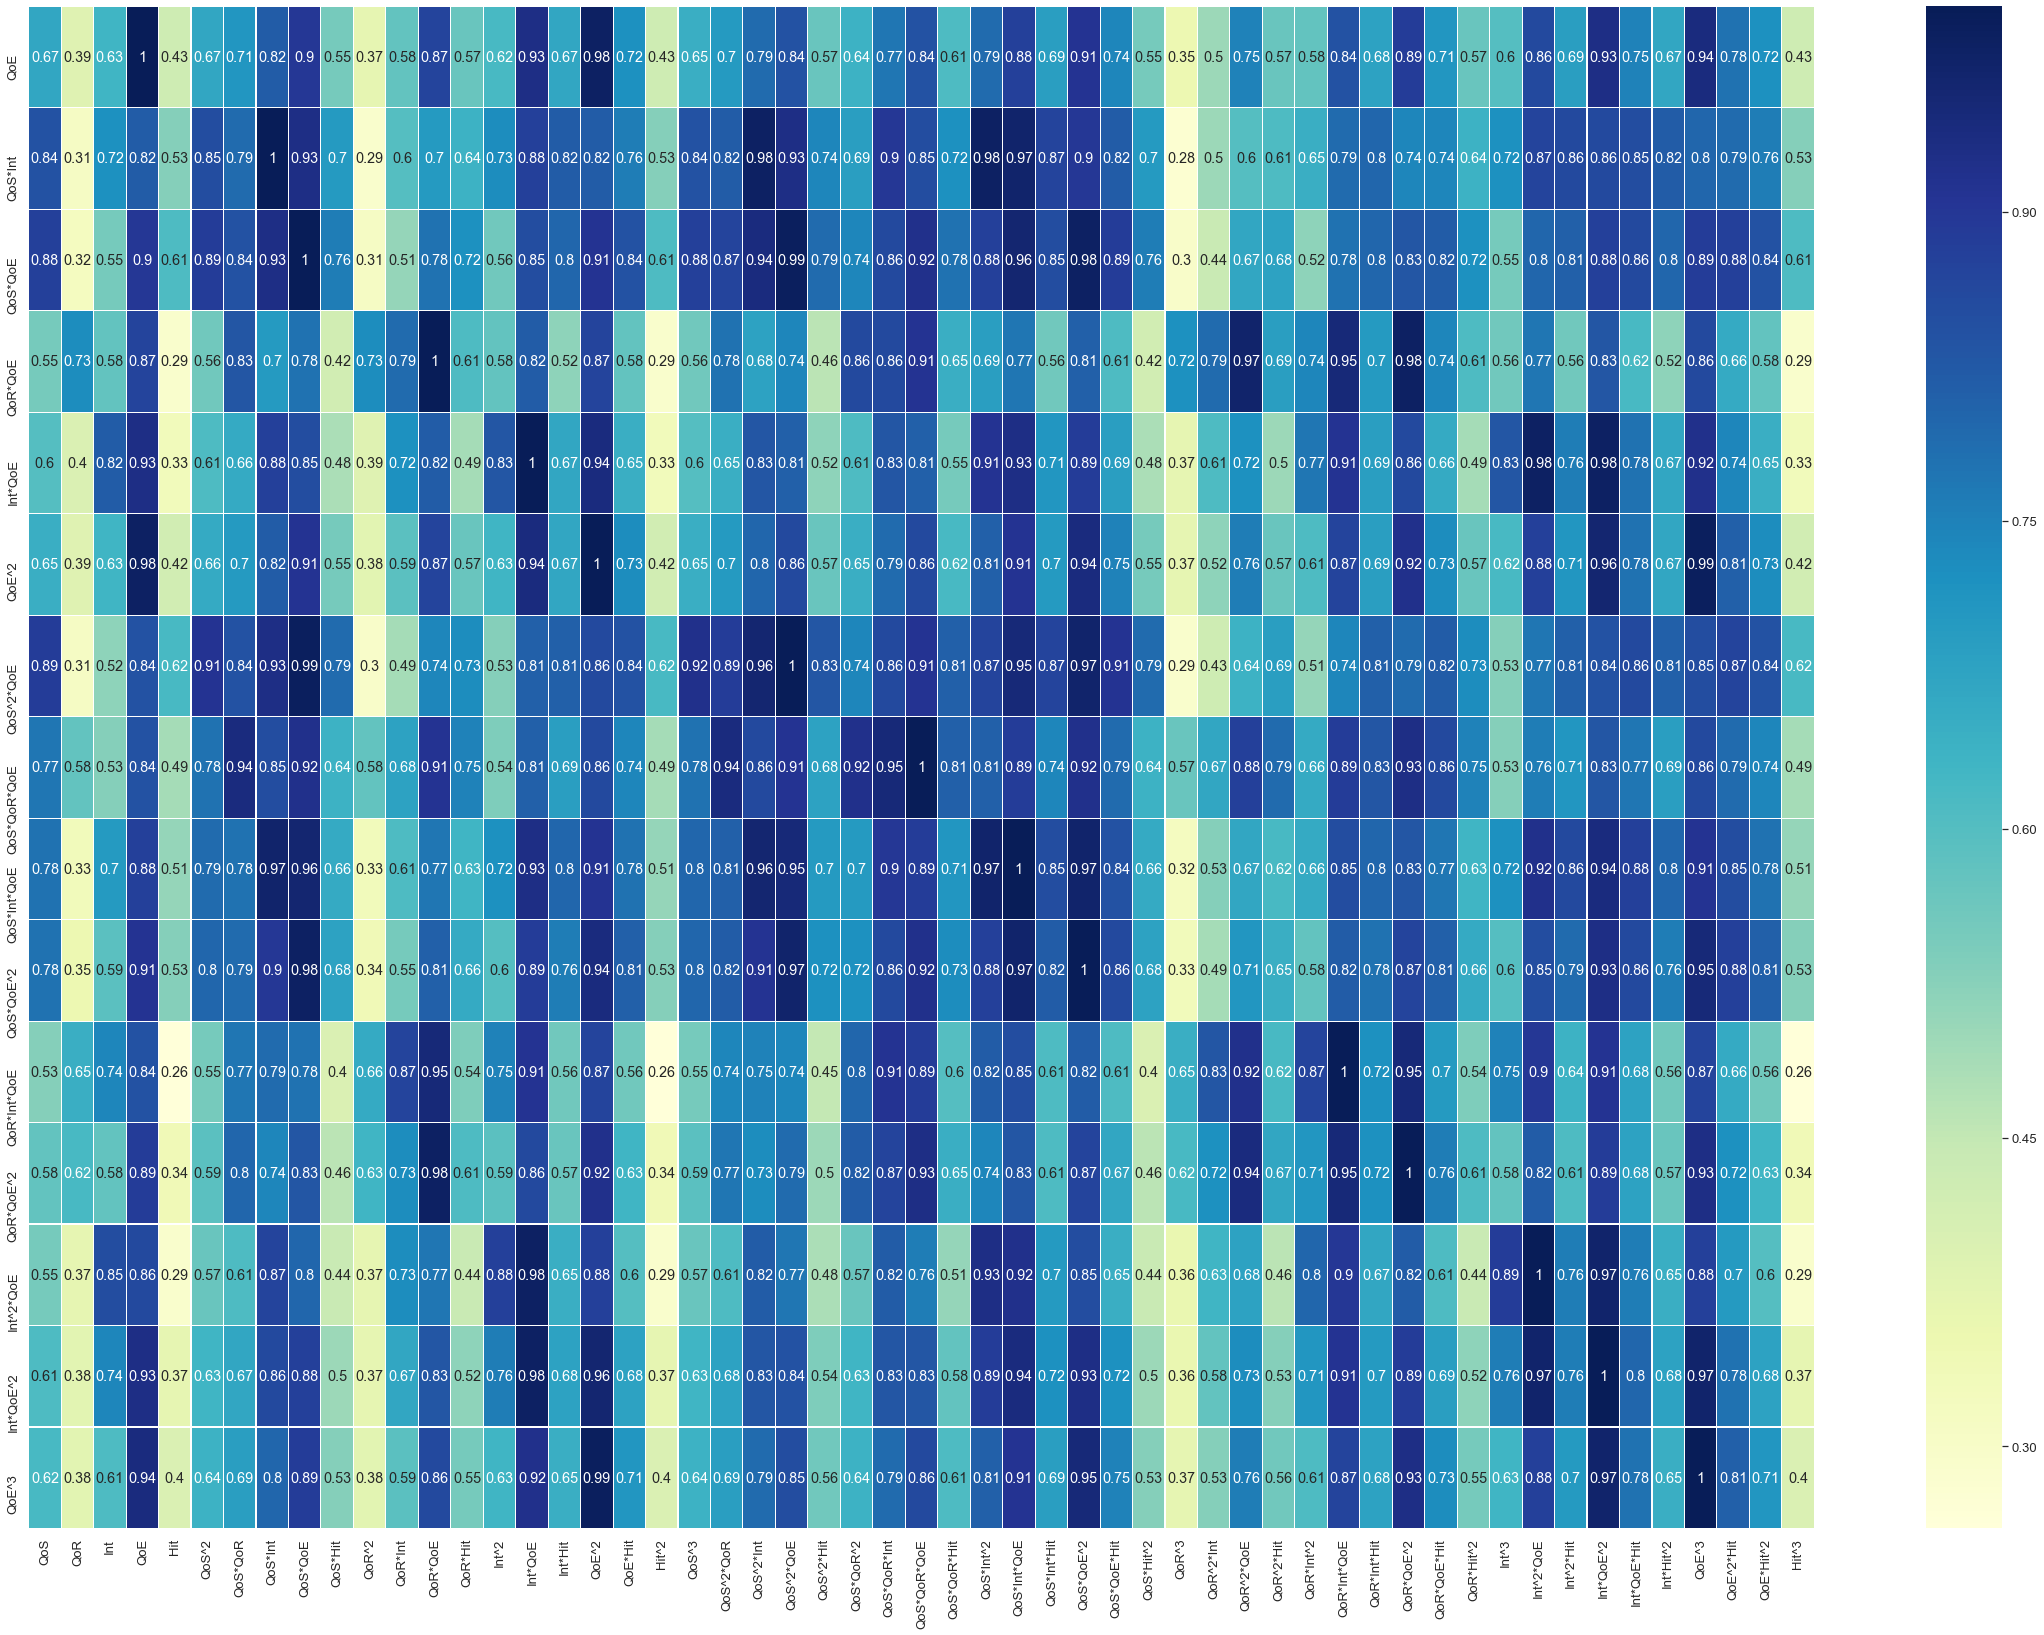

In [221]:
sns.heatmap(np.round( df_transformed.corr().loc[df_transformed.corr().QoE>0.8] ,2), annot=True, linewidths=.1, cmap="YlGnBu")

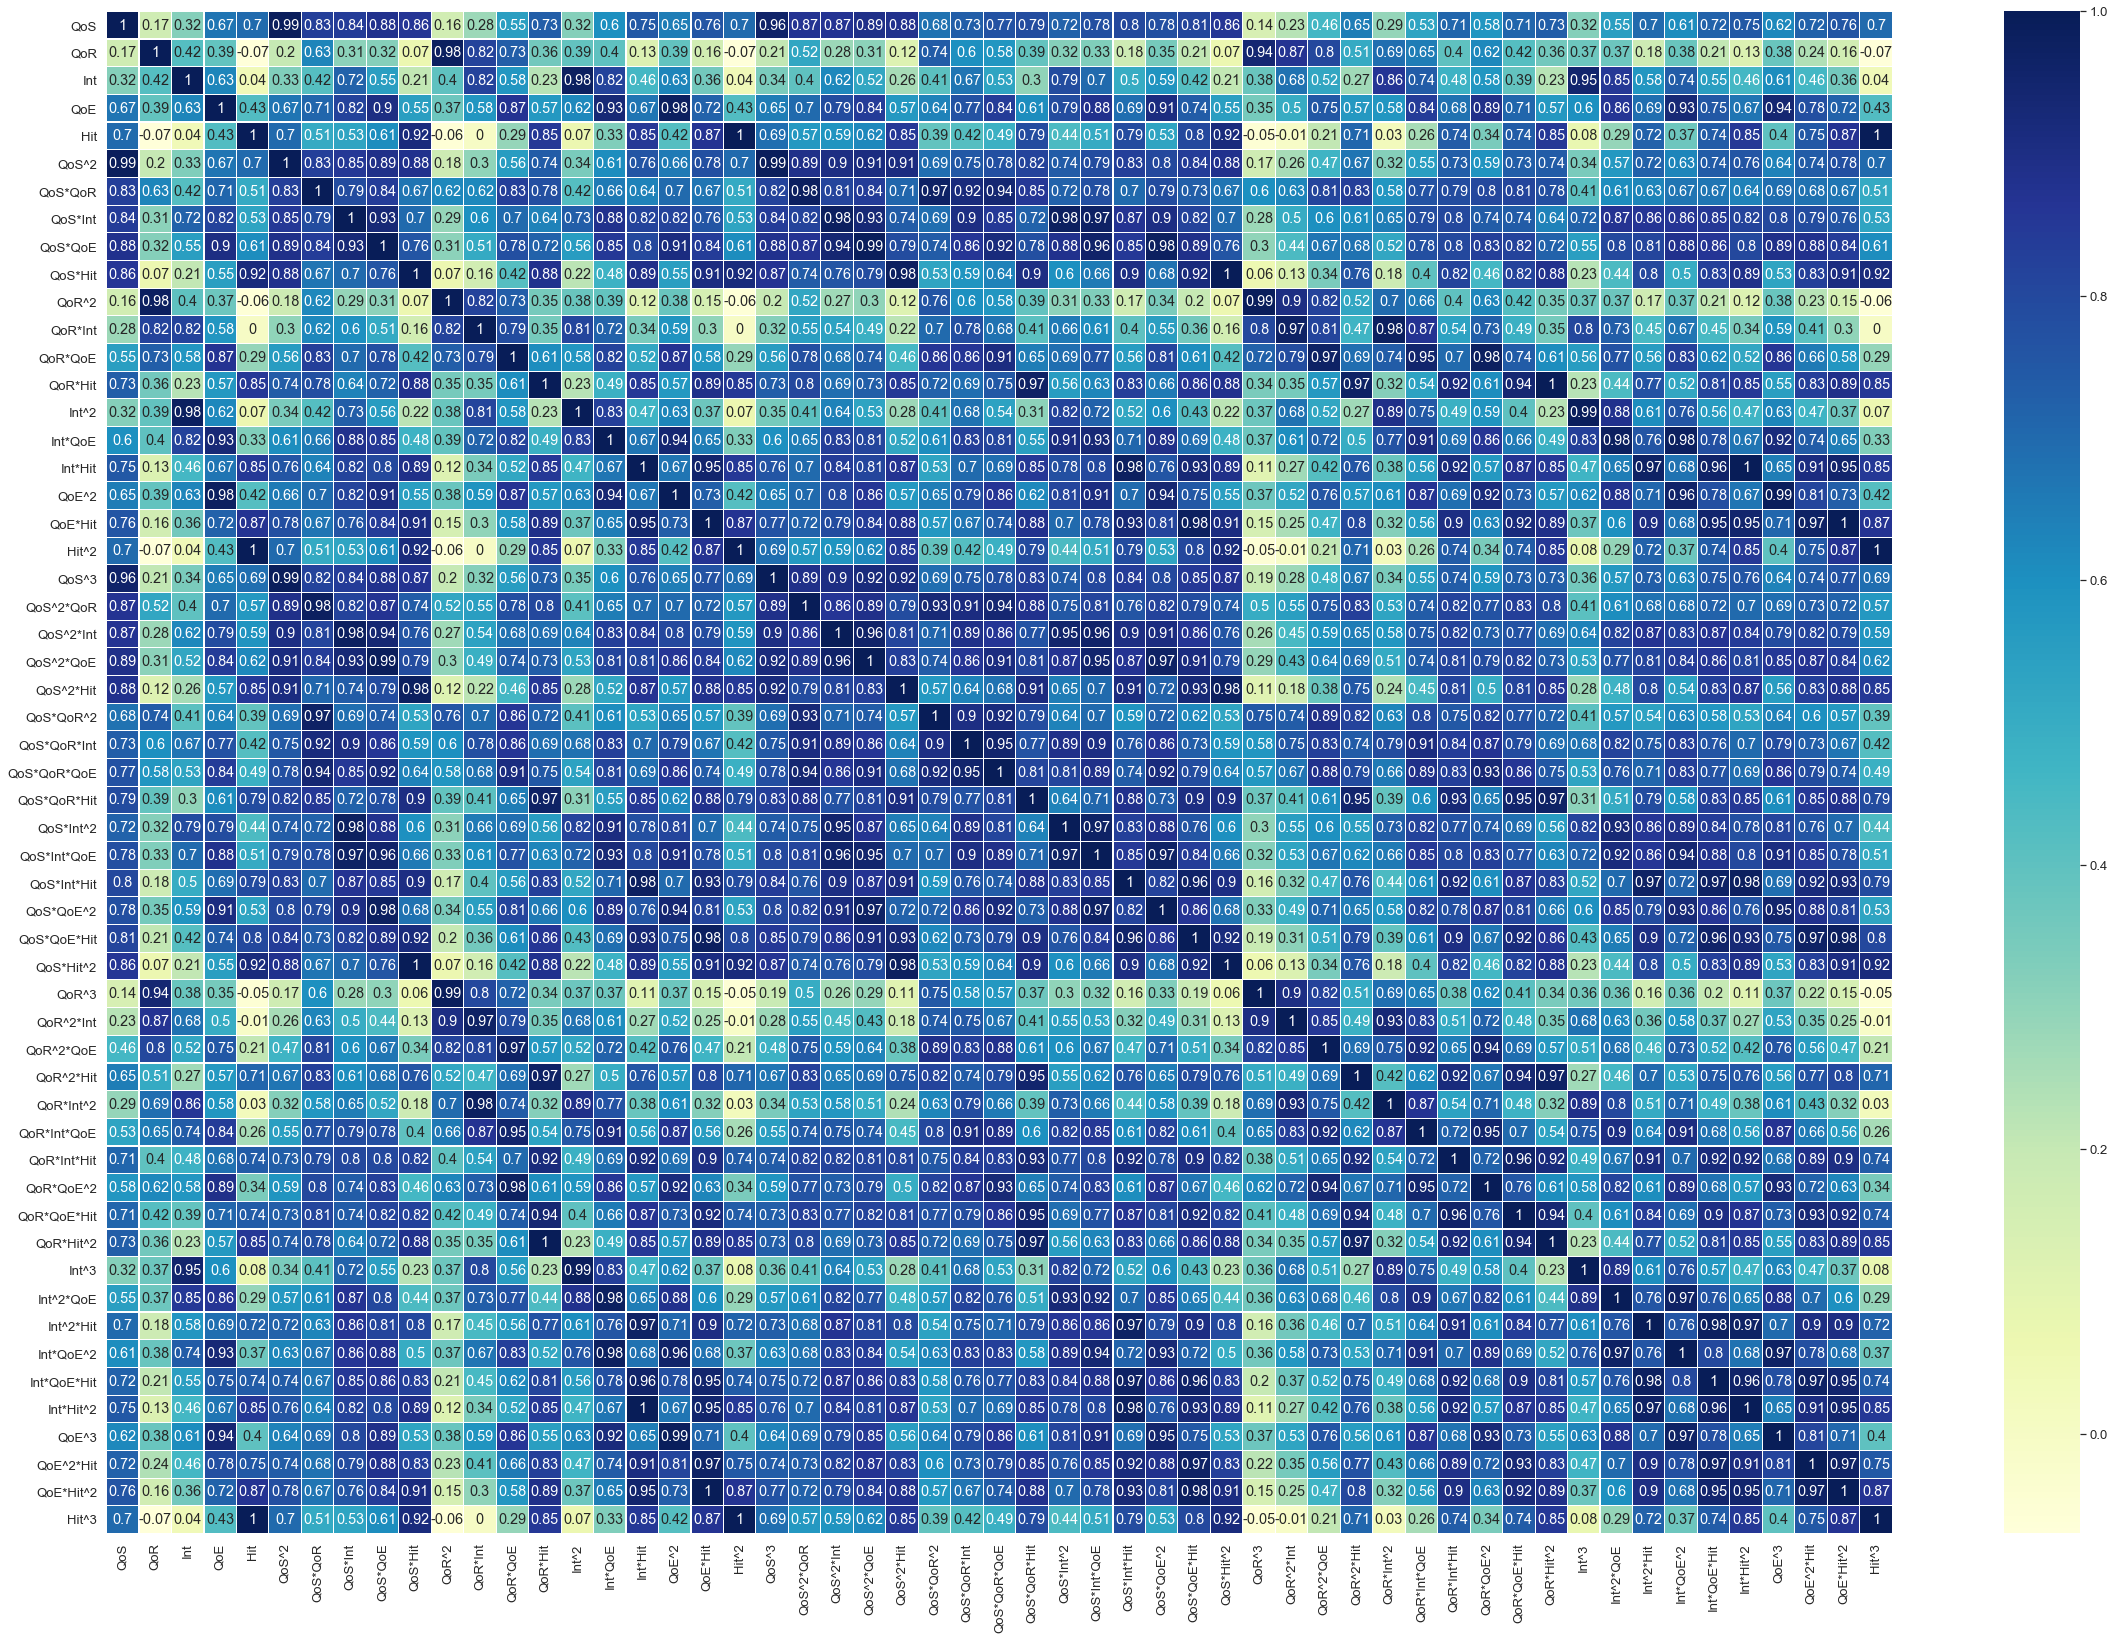

In [215]:
sns.set(rc={'figure.figsize':(40,28), 'font.size': 16})
sns.set(font_scale=1.2, style='white')
sns.heatmap(np.round(df_transformed.corr(),2), annot=True, linewidths=.1, cmap="YlGnBu")

In [45]:
df_transformed

,QoS,QoR,Int,QoE,Hit,QoS*QoR,QoS*Int,QoS*QoE,QoS*Hit,QoR*Int,QoR*QoE,QoR*Hit,Int*QoE,Int*Hit,QoE*Hit
0,5.0,3.0,1.0,2.0,1.0,15.0,5.0,10.0,5.0,3.0,6.0,3.0,2.0,1.0,2.0
1,3.0,4.0,4.0,4.0,1.0,12.0,12.0,12.0,3.0,16.0,16.0,4.0,16.0,4.0,4.0
2,4.0,5.0,3.0,4.0,1.0,20.0,12.0,16.0,4.0,15.0,20.0,5.0,12.0,3.0,4.0
3,4.0,5.0,1.0,1.0,1.0,20.0,4.0,4.0,4.0,5.0,5.0,5.0,1.0,1.0,1.0
4,3.0,2.0,4.0,3.0,1.0,6.0,12.0,9.0,3.0,8.0,6.0,2.0,12.0,4.0,3.0
5,5.0,2.0,5.0,4.0,1.0,10.0,25.0,20.0,5.0,10.0,8.0,2.0,20.0,5.0,4.0
6,4.0,4.0,4.0,4.0,1.0,16.0,16.0,16.0,4.0,16.0,16.0,4.0,16.0,4.0,4.0
7,5.0,5.0,4.0,4.0,1.0,25.0,20.0,20.0,5.0,20.0,20.0,5.0,16.0,4.0,4.0
8,4.0,3.0,4.0,4.0,1.0,12.0,16.0,16.0,4.0,12.0,12.0,3.0,16.0,4.0,4.0
9,3.0,4.0,4.0,4.0,0.0,12.0,12.0,12.0,0.0,16.0,16.0,0.0,16.0,0.0,0.0


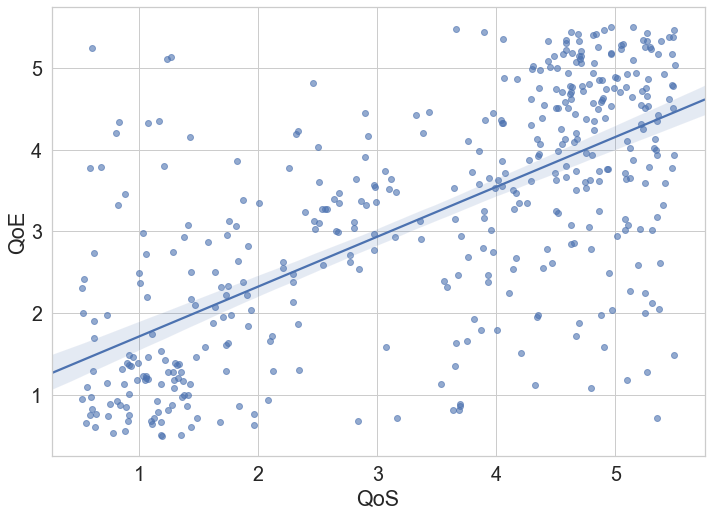

In [180]:
sns.regplot('QoS', 'QoE', df_transformed, x_jitter=0.5, y_jitter=0.5, robust=False, marker='o', scatter_kws={'alpha': 0.6}) 

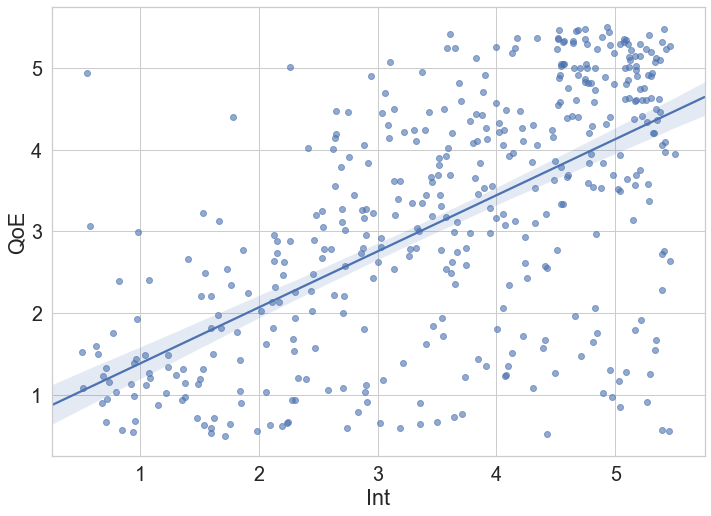

In [181]:
sns.regplot('Int', 'QoE', df_transformed, x_jitter=0.5, y_jitter=0.5, robust=False, marker='o', scatter_kws={'alpha': 0.6}) 

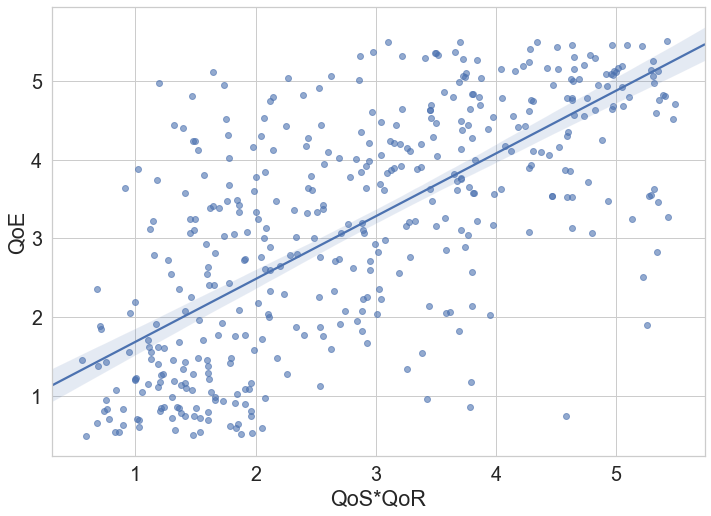

In [182]:
sns.regplot('QoS*QoR', 'QoE', df_transformed, x_jitter=0.5, y_jitter=0.5, robust=False, marker='o', scatter_kws={'alpha': 0.6}) 

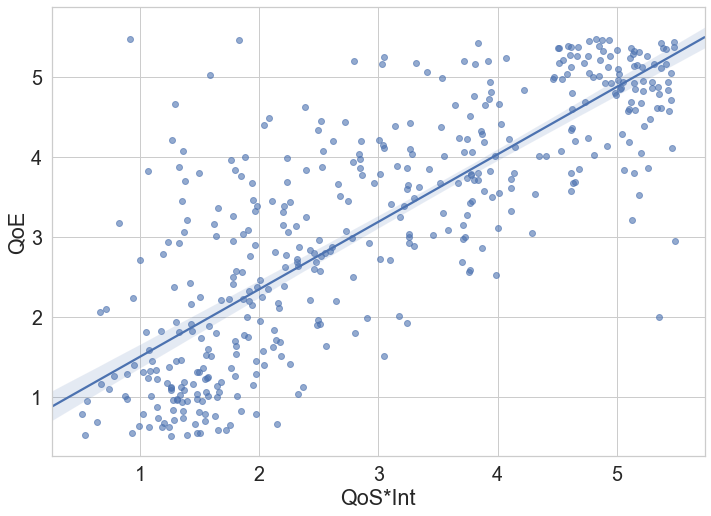

In [183]:
sns.regplot('QoS*Int', 'QoE', df_transformed, x_jitter=0.5, y_jitter=0.5, robust=False, marker='o', scatter_kws={'alpha': 0.6}) 

In [143]:
def rand_jitter(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitterScatterPlot(data, x, y, s=20, c='b', marker='o'):
    ax = plt.scatter(rand_jitter(data[x]), rand_jitter(data[y]), alpha=0.5)
    ax = plt.xlabel(x)
    ax = plt.ylabel(y)
    return ax

def jitterRegPlot(data, x, y, s=20, c='b', marker='o'):
    ax = sns.regplot(x=rand_jitter(data[x]), y=rand_jitter(data[y]))

sns.set(rc={'figure.figsize':(11.7,8.27), 'font.size': 16})
sns.set(font_scale=1.8, style='whitegrid')

In [164]:
# jitterRegPlot(df_transformed, 'QoS', 'QoE')

In [162]:
# jitterScatterPlot(df_transformed, 'QoS', 'QoE')

In [163]:
# jitterScatterPlot(df_transformed, 'Int', 'QoE')

In [ ]:
jitterScatterPlot(df_transformed, 'QoS', 'QoE')

In [112]:
df_transformed.columns

Index(['QoS', 'QoR', 'Int', 'QoE', 'Hit', 'QoS*QoR', 'QoS*Int', 'QoS*QoE',
       'QoS*Hit', 'QoR*Int', 'QoR*QoE', 'QoR*Hit', 'Int*QoE', 'Int*Hit',
       'QoE*Hit'],
      dtype='object')

In [71]:
pd.DataFrame.from_dict( list(df_transformed.items()), orient='index')

AttributeError: 'list' object has no attribute 'values'

In [61]:
pd.DataFrame.from_dict(list(df_transformed.items()), columns = ['QoE','QoS'])


ValueError: cannot use columns parameter with orient='columns'

# Models

In [26]:
df_transformed.columns

MultiIndex(levels=[['Hit', 'Int', 'Int*Hit', 'Int*QoE', 'QoE', 'QoR', 'QoR*Hit', 'QoR*Int', 'QoR*QoE', 'QoS', 'QoS*Hit', 'QoS*Int', 'QoS*QoE', 'QoS*QoR']],
           codes=[[9, 5, 1, 4, 0, 13, 11, 12, 11, 10, 7, 8, 6, 3, 2]])

In [30]:
X

NameError: name 'X' is not defined

In [59]:
df_transformed.drop(columns=['QoE', 'Int*QoE', 'QoR*QoE', 'QoS*QoE'], axis=1)

TypeError: Expected tuple, got str

In [58]:
df_transformed

,QoS,QoR,Int,QoE,Hit,QoS*QoR,QoS*Int,QoS*QoE,QoS*Int,QoS*Hit,QoR*Int,QoR*QoE,QoR*Hit,Int*QoE,Int*Hit
0,5.0,3.0,1.0,2.0,1.0,15.0,5.0,10.0,5.0,3.0,6.0,3.0,2.0,1.0,2.0
1,3.0,4.0,4.0,4.0,1.0,12.0,12.0,12.0,3.0,16.0,16.0,4.0,16.0,4.0,4.0
2,4.0,5.0,3.0,4.0,1.0,20.0,12.0,16.0,4.0,15.0,20.0,5.0,12.0,3.0,4.0
3,4.0,5.0,1.0,1.0,1.0,20.0,4.0,4.0,4.0,5.0,5.0,5.0,1.0,1.0,1.0
4,3.0,2.0,4.0,3.0,1.0,6.0,12.0,9.0,3.0,8.0,6.0,2.0,12.0,4.0,3.0
5,5.0,2.0,5.0,4.0,1.0,10.0,25.0,20.0,5.0,10.0,8.0,2.0,20.0,5.0,4.0
6,4.0,4.0,4.0,4.0,1.0,16.0,16.0,16.0,4.0,16.0,16.0,4.0,16.0,4.0,4.0
7,5.0,5.0,4.0,4.0,1.0,25.0,20.0,20.0,5.0,20.0,20.0,5.0,16.0,4.0,4.0
8,4.0,3.0,4.0,4.0,1.0,12.0,16.0,16.0,4.0,12.0,12.0,3.0,16.0,4.0,4.0
9,3.0,4.0,4.0,4.0,0.0,12.0,12.0,12.0,0.0,16.0,16.0,0.0,16.0,0.0,0.0


In [57]:
df_transformed.drop(columns=['QoE'], axis=1)

TypeError: Expected tuple, got str

In [31]:
from sklearn import linear_model
from sklearn.model_selection import cross_validate

y = df_transformed['QoE']
X = df_transformed.drop(['QoE', 'Int*QoE', 'QoR*QoE', 'QoE*QoE'], axis=1)

reg = linear_model.Lasso(alpha=0.1)

cv_results = cross_validate(reg, X, y, cv=10,
                            scoring = ["accuracy"] , n_jobs=4)

TypeError: Expected tuple, got str

In [20]:
selectedFeatures = ['QoS', 'Int', 'QoR', 'QoS*Int', 'QoS^2*Int', 'QoS*QoR*Int', 'QoS*Int^2']
selectedFeaturesAll = ['QoS', 'Int', 'QoR', 'QoS*Int', 'QoS^2*Int', 'QoS*QoR*Int', 'QoS*Int^2', 'QoE']

In [153]:
selectedFeatures

['QoS', 'Int', 'QoR', 'QoS*Int', 'QoS^2*Int', 'QoS*QoR*Int', 'QoS*Int^2']

In [26]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(df_transformed[selectedFeatures], df_transformed['QoE'])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# Apply Models

In [155]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3, include_bias=False, interaction_only=False)
X = df_data.drop(columns='QoE')
X = poly.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
scaler.fit(X)
X = scaler.transform(X)
X

array([[5.  , 3.  , 1.  , ..., 1.16, 1.8 , 5.  ],
       [3.  , 4.  , 4.  , ..., 3.56, 4.2 , 5.  ],
       [4.  , 5.  , 3.  , ..., 2.44, 3.4 , 5.  ],
       ...,
       [5.  , 5.  , 5.  , ..., 1.  , 1.  , 1.  ],
       [2.  , 2.  , 2.  , ..., 1.  , 1.  , 1.  ],
       [4.  , 3.  , 4.  , ..., 3.56, 4.2 , 5.  ]])

In [156]:
features = [{'old': 'x0', 'new': 'QoS'}, {'old': 'x1', 'new': 'QoR'}, {'old': 'x2', 'new': 'Int'}, {'old': 'x3', 'new': 'Hit'}]

featureNames = poly.get_feature_names()
for i in range (len( featureNames )):
    for pair in features:
        featureNames[i] = featureNames[i].replace(pair['old'], pair['new'])
    featureNames[i] =featureNames[i].replace( ' ', '*')
        

X = pd.DataFrame(X, columns=featureNames)
X

,QoS,QoR,Int,Hit,QoS^2,QoS*QoR,QoS*Int,QoS*Hit,QoR^2,QoR*Int,...,QoR^3,QoR^2*Int,QoR^2*Hit,QoR*Int^2,QoR*Int*Hit,QoR*Hit^2,Int^3,Int^2*Hit,Int*Hit^2,Hit^3
0,5.0,3.0,1.0,5.0,5.000000,3.333333,1.666667,5.0,2.333333,1.333333,...,1.838710,1.258065,2.44,1.064516,1.48,3.4,1.000000,1.16,1.8,5.0
1,3.0,4.0,4.0,5.0,2.333333,2.833333,2.833333,3.4,3.500000,3.500000,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
2,4.0,5.0,3.0,5.0,3.500000,4.166667,2.833333,4.2,5.000000,3.333333,...,5.000000,3.387097,5.00,2.419355,3.40,5.0,1.838710,2.44,3.4,5.0
3,4.0,5.0,1.0,5.0,3.500000,4.166667,1.500000,4.2,5.000000,1.666667,...,5.000000,1.774194,5.00,1.129032,1.80,5.0,1.000000,1.16,1.8,5.0
4,3.0,2.0,4.0,5.0,2.333333,1.833333,2.833333,3.4,1.500000,2.166667,...,1.225806,1.483871,1.64,2.000000,2.28,2.6,3.032258,3.56,4.2,5.0
5,5.0,2.0,5.0,5.0,5.000000,2.500000,5.000000,5.0,1.500000,2.500000,...,1.225806,1.612903,1.64,2.580645,2.60,2.6,5.000000,5.00,5.0,5.0
6,4.0,4.0,4.0,5.0,3.500000,3.500000,3.500000,4.2,3.500000,3.500000,...,3.032258,3.032258,3.56,3.032258,3.56,4.2,3.032258,3.56,4.2,5.0
7,5.0,5.0,4.0,5.0,5.000000,5.000000,4.166667,5.0,5.000000,4.166667,...,5.000000,4.193548,5.00,3.548387,4.20,5.0,3.032258,3.56,4.2,5.0
8,4.0,3.0,4.0,5.0,3.500000,2.833333,3.500000,4.2,2.333333,2.833333,...,1.838710,2.129032,2.44,2.516129,2.92,3.4,3.032258,3.56,4.2,5.0
9,3.0,4.0,4.0,1.0,2.333333,2.833333,2.833333,1.0,3.500000,3.500000,...,3.032258,3.032258,1.00,3.032258,1.00,1.0,3.032258,1.00,1.0,1.0


In [75]:
# X = df_transformed.drop(columns='QoE')
y = df_data['QoE']

lasso = linear_model.Lasso(alpha=0.2)

from sklearn.model_selection import cross_validate
cv_results = cross_validate(lasso, X, y, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
sorted(cv_results.keys())                         

print('Train R2:')
print( np.mean(cv_results['train_r2']) )
print( '\n')
print('Test R2:')
print( np.mean(cv_results['test_r2']) )
print( '\n')

Train R2:
0.6740413842812675


Test R2:
0.6293431402289125




In [76]:
cv_results['test_neg_mean_squared_error']

array([-0.80737352, -0.78296256, -0.65236601, -0.78499833, -0.86029143,
       -0.6287479 , -1.01630824, -0.72527159, -0.55537653, -0.54439422])

In [138]:
alphaGrid = np.arange(0, 50, 1)

In [112]:
from sklearn.neighbors import NearestNeighbors

In [119]:
X = df_data[['QoS','Int','QoR','Hit']]

In [157]:
X = X[selectedFeatures]

In [162]:
resultsList = []
for alpha in alphaGrid:
    lasso = linear_model.Lasso(alpha=alpha)
#     ridge = linear_model.Ridge(alpha=alpha)
#     knn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

    from sklearn.model_selection import cross_validate
    cv_results = cross_validate(ridge, X, y, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    sorted(cv_results.keys())    
    resultsList += [{
                    'train_r2': np.mean(cv_results['train_r2']),
                    'test_r2': np.mean(cv_results['test_r2']),
                    'train_neg_mean_squared_error': np.mean(cv_results['train_neg_mean_squared_error']),
                    'test_neg_mean_squared_error': np.mean(cv_results['test_neg_mean_squared_error']),
                    'alpha': alpha
                   }]

#     print('Train R2:')
#     print( np.mean(cv_results['train_r2']) )
#     print( '\n')
#     print('Test R2:')
#     print( np.mean(cv_results['test_r2']) )
#     print( '\n')

In [165]:
resultsList = []
nGrid = np.arange(1, 50, 1)
for n in nGrid:
#     lasso = linear_model.Lasso(alpha=alpha)
#     ridge = linear_model.Ridge(alpha=alpha)
    knn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree')

    from sklearn.model_selection import cross_validate
    cv_results = cross_validate(ridge, X, y, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
    sorted(cv_results.keys())    
    resultsList += [{
                    'train_r2': np.mean(cv_results['train_r2']),
                    'test_r2': np.mean(cv_results['test_r2']),
                    'train_neg_mean_squared_error': np.mean(cv_results['train_neg_mean_squared_error']),
                    'test_neg_mean_squared_error': np.mean(cv_results['test_neg_mean_squared_error']),
                    'n': n
                   }]

In [171]:
aux = 0;
bestResult = {};
for result in resultsList:
    if (result['test_r2'] > aux):
        aux = result['test_r2']
        bestResult = result
    
print(bestResult)

{'train_r2': 0.683739757931128, 'test_r2': 0.6462893880598608, 'train_neg_mean_squared_error': -0.6695843140900253, 'test_neg_mean_squared_error': -0.7025372725285851, 'n': 1}
